# 1. Libraries and Packages

In [1]:
# import general packages - numpy,pandas,seaborn,matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set

# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# 2. Import Cleaned Dataset

In [3]:
#Import the data set
traindata = pd.read_csv('cleaned_data.csv')
traindata.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85,0,0,1,4,1,186.21,29.0,1,1


# 3. Model 4: Gaussian Naive Bayes Model

## Background Information about Gaussian Naive Bayes Model: 

Gaussian Naive Bayes is a probabilistic machine learning algorithm used for classification tasks. It is a variant of the Naive Bayes algorithm, which is based on the Bayes' theorem and the assumption of independence among the features.

In Gaussian Naive Bayes, the assumption is made that the continuous input features are normally distributed. This means that the probability density function of each feature follows a Gaussian (normal) distribution. This assumption simplifies the calculations of the posterior probabilities and reduces the complexity of the algorithm.

The algorithm works by calculating the probability of a given instance belonging to a particular class based on the values of its features. It does this by calculating the prior probability of each class and the likelihood of the features given the class. The posterior probability of each class is then calculated by multiplying the prior probability by the likelihood and normalizing the result.

The algorithm is called "naive" because it assumes that all the features are independent of each other, which is not always true in practice. Despite this assumption, Gaussian Naive Bayes has been found to perform well in many real-world applications, especially when the number of features is large relative to the size of the training data.

One of the advantages of Gaussian Naive Bayes is that it requires a small amount of training data compared to other algorithms. It is also computationally efficient and can be trained quickly. However, it may not perform well if the assumption of normality is not met or if there is strong correlation among the features.

### Step 1: Separate predictors and responses 

In [4]:
#Splitting the data into input data features and target 
predictors = traindata.drop('stroke',axis=1)
stroke = traindata['stroke']

### Step 2: Split the dataset into training and testing datasets in 8:2 ratio 

In [5]:
# Split the Dataset into Train and Test
stroke_train, stroke_test, predictors_train, predictors_test = train_test_split(stroke, predictors, test_size = 0.2, random_state = 42)

In [6]:
#Create the Naive Bayes classifier
nb = GaussianNB()

# Train the classifier on the training data
nb.fit(predictors_train, stroke_train)

# Predict the classes of the test data
stroke_prediction = nb.predict(predictors_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(stroke_test, stroke_prediction)
print('Accuracy:', accuracy)

Accuracy: 0.6681762545899633


### Step 3: Compute the accuracy of Gaussian Naive Bayes Model

              precision    recall  f1-score   support

           0    0.63324   0.78995   0.70297      4061
           1    0.72519   0.54782   0.62415      4109

    accuracy                        0.66818      8170
   macro avg    0.67922   0.66889   0.66356      8170
weighted avg    0.67949   0.66818   0.66333      8170



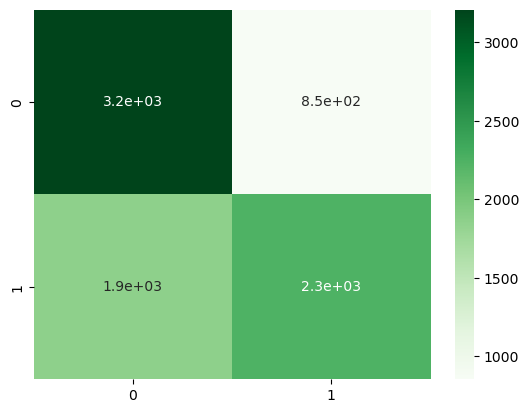

In [7]:
cm = confusion_matrix(stroke_test, stroke_prediction)
sb.heatmap(cm, annot=True, cmap='Greens')

# Create a classification report
cr = classification_report(stroke_test, stroke_prediction, digits = 5)
print(cr)

# 4. Optimisation of Gaussian Naive Bayes Model 

Hyperparameters in a Gaussian Naive Bayes model refer to the configuration settings that are not learned from data but must be set before training the model. Hyperparameters can affect the model's ability to fit the training data and its generalization performance on new, unseen data.

We have decided to use smoothing parameter to avoid the problem of zero probabilities when a feature does not appear in the training dataset for a given class. The most commonly used smoothing method is Laplace smoothing, which adds a small constant to all feature counts. By fine-tuning the smoothing parameter, we can prevent overfitting and improve the model's generalization performance. 

### Step 1: Insert smoothing parameters 

In [8]:
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Define the hyperparameters to tune
parameters = {
    'var_smoothing': np.logspace(0,-9,num=100)
}

# Perform Grid Search CV to find the best hyperparameters
grid_search = GridSearchCV(nb, parameters, scoring='roc_auc', cv=10, n_jobs=-1)
grid_search.fit(predictors_train, stroke_train)


# Make predictions on the test set using the best model
stroke_pred = grid_search.predict(predictors_test)

# Calculate the accuracy score
accuracy = accuracy_score(stroke_test, stroke_pred)
print("Accuracy Score: ", accuracy)

Accuracy Score:  0.6741738066095472


### Step 2: Recompute accuracy of the optimised model

              precision    recall  f1-score   support

           0    0.64123   0.78207   0.70468      4061
           1    0.72490   0.56753   0.63664      4109

    accuracy                        0.67417      8170
   macro avg    0.68306   0.67480   0.67066      8170
weighted avg    0.68331   0.67417   0.67046      8170



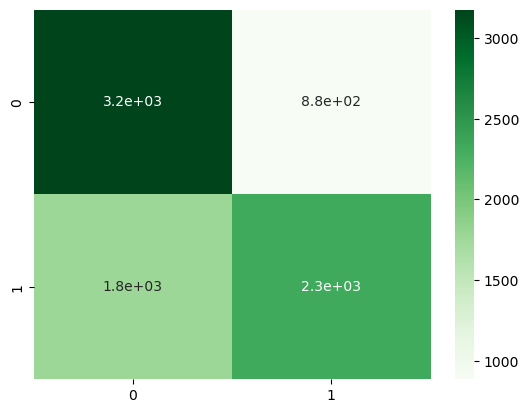

In [9]:
cm = confusion_matrix(stroke_test, stroke_pred)
sb.heatmap(cm, annot=True, cmap='Greens')

# Create a classification report
cr = classification_report(stroke_test, stroke_pred, digits=5)
print(cr)